<a href="https://colab.research.google.com/github/SWLee1212/KAIST-ML-Advanced-courses/blob/master/4_2_%EC%9D%98%EC%82%AC%EA%B2%B0%EC%A0%95%EB%82%98%EB%AC%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

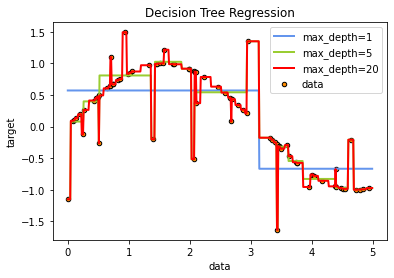

In [2]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# from elice_utils import EliceUtils
# elice_utils = EliceUtils()

# 랜덤한 데이터 셋을 생성하여 반환하는 함수입니다.
def load_data():
    
    rng = np.random.RandomState(1)
    X = np.sort(5 * rng.rand(80, 1), axis=0)
    y = np.sin(X).ravel()
    y[::5] += 3 * (0.5 - rng.rand(16))
    
    return X, y
"""
1. 회귀 의사결정 나무 모델을 이용하여
   학습 및 예측을 수행한 결과를 반환하는 함수를 구현합니다.
   
   Step01. 회귀를 위한 
           의사결정 나무 모델을 정의합니다.
   
   Step02. 정의한 의사결정 나무 모델을 
           데이터에 맞추어 학습시킵니다.
           
   Step03. 학습된 모델을 이용하여 
           테스트 데이터에 대한 예측을 수행합니다.
"""
def DT_Reg(X, y, X_test, m_depth):
    
    reg = DecisionTreeRegressor(max_depth=m_depth)
    
    reg.fit(X,y)
    
    pred = reg.predict(X_test)
    
    return pred
    
# 회귀를 위한 의사결정 나무 결과를 그래프로 시각화합니다.
def Visualize(X, y, X_test, y_1, y_5, y_20):
    
    plt.figure()
    plt.scatter(X, y, s=20, edgecolor="black",
                c="darkorange", label="data")
    plt.plot(X_test, y_1, color="cornflowerblue",
             label="max_depth=1", linewidth=2)
    plt.plot(X_test, y_5, color="yellowgreen", label="max_depth=5", linewidth=2)
    plt.plot(X_test, y_20, color="red", label="max_depth=20", linewidth=2)
    plt.xlabel("data")
    plt.ylabel("target")
    plt.title("Decision Tree Regression")
    plt.legend()
    
    plt.savefig('decision_regressor.png')
    # elice_utils.send_image('decision_regressor.png')
    
"""
2. 다양한 max_depth 인자를 설정한
   회귀 의사결정 나무 모델로 
   학습, 예측을 수행한 후 결과를 확인하는 함수를 구현합니다.
   
   Step01. 구현된 DT_Reg 함수를 이용하여 
           각각 max_depth가 1,5,20 인 의사결정 나무 모델로 
           테스트 데이터에 대한 예측을 하고, 그 값을 저장합니다.
"""
def main():
    
    X, y = load_data()
    
    X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
    
    # max_depth = 1
    y_1 = DT_Reg(X, y, X_test, 1)
    
    # max_depth = 5
    y_5 = DT_Reg(X, y, X_test, 5)
    
    # max_depth = 20
    y_20 = DT_Reg(X, y, X_test, 20)
    
    Visualize(X, y, X_test, y_1, y_5, y_20)
    
    return y_1, y_5, y_20
    
if __name__ == "__main__":
    main()
